In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split, KFold, cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score,roc_curve,auc,precision_recall_curve, accuracy_score, \
recall_score, precision_score, confusion_matrix, make_scorer
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import VotingRegressor, VotingClassifier, StackingRegressor, StackingClassifier, GradientBoostingRegressor,GradientBoostingClassifier, BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier,AdaBoostRegressor,AdaBoostClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor

In [3]:
nba_2017 = pd.read_csv('NBA Players Stats 201718.csv')
nba_2017['Player'] = nba_2017['Player'].str.split('\\').str[0]
duplicated_players = nba_2017['Player'].duplicated(keep=False)

mask = duplicated_players & (nba_2017['Tm'] == 'TOT')


filtered_df = nba_2017[mask]


single_team_df = nba_2017[~duplicated_players]


nba_2017_2018 = pd.concat([filtered_df, single_team_df])
nba_2017_2018 = nba_2017_2018.reset_index(drop=True)
nba_2017_2018 = nba_2017_2018.drop(columns=['Rk','Tm', 'Pos'], axis=1)
nba_2017_2018.fillna(0, inplace=True)
nba_2017_2018 = nba_2017_2018[nba_2017_2018['G'] >= 20]
nba_2017_2018 = nba_2017_2018.reset_index(drop=True)

percentage_columns = ['FG%', '3P%', '2P%', 'eFG%', 'FT%']
for col in percentage_columns:
    nba_2017_2018[col] = nba_2017_2018[col] * 100

all_star_list = ['Kemba Walker', 'Kyrie Irving', 'Kawhi Leonard', 'Giannis Antetokounmpo', 
                'Joel Embiid', 'Kyle Lowry', 'Victor Oladipo', 'Khris Middleton', 'Bradley Beal',
                'Ben Simmons', 'Blake Griffin', 'Nikola Vučević', "D'Angelo Russell",
                'Stephen Curry', 'James Harden', 'Kevin Durant', 'Paul George', 'LeBron James',
                'Russell Westbrook', 'Damian Lillard', 'Klay Thompson', 'Anthony Davis', 
                'LaMarcus Aldridge', 'DeMarcus Cousins', 'Nikola Jokić', 'Karl-Anthony Towns']
nba_2017_2018['AS_NY'] = nba_2017_2018['Player'].apply(lambda x: 1 if x in all_star_list else 0)

In [4]:
nba_2017_2018.head()

,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,AS_NY
0,Luke Babbitt,28,50,14,14.3,1.8,4.3,42.3,1.2,3.1,...,0.1,1.8,1.9,0.6,0.2,0.1,0.4,1.1,5.2,0
1,Marco Belinelli,31,80,2,24.3,4.2,9.6,44.1,1.9,4.9,...,0.3,1.6,1.9,1.9,0.8,0.2,1.2,1.1,12.1,0
2,Eric Bledsoe,28,74,74,31.4,6.3,13.4,47.3,1.7,4.9,...,0.7,3.1,3.8,5.0,2.0,0.6,2.9,2.5,17.7,0
3,Trevor Booker,30,68,7,17.0,2.6,5.0,51.6,0.1,0.5,...,1.7,3.0,4.7,1.2,0.4,0.3,0.9,1.8,6.3,0
4,Avery Bradley,27,46,46,31.2,5.6,13.6,41.4,1.6,4.4,...,0.5,2.0,2.5,2.0,1.1,0.2,2.2,2.0,14.3,0


In [5]:
nba_2018 = pd.read_csv('NBA Players Stats 201819.csv')
nba_2018['Player'] = nba_2018['Player'].str.split('\\').str[0]
duplicated_players = nba_2018['Player'].duplicated(keep=False)

mask = duplicated_players & (nba_2018['Tm'] == 'TOT')


filtered_df = nba_2018[mask]


single_team_df = nba_2018[~duplicated_players]


nba_2018_2019 = pd.concat([filtered_df, single_team_df])
nba_2018_2019 = nba_2018_2019.reset_index(drop=True)
nba_2018_2019 = nba_2018_2019.drop(columns=['Rk','Tm', 'Pos'], axis=1)
nba_2018_2019.fillna(0, inplace=True)
nba_2018_2019 = nba_2018_2019[nba_2018_2019['G'] >= 20]
nba_2018_2019 = nba_2018_2019.reset_index(drop=True)

percentage_columns = ['FG%', '3P%', '2P%', 'eFG%', 'FT%']
for col in percentage_columns:
    nba_2018_2019[col] = nba_2018_2019[col] * 100

all_star_list = ['Kemba Walker', 'Trae Young', 'Giannis Antetokounmpo', 'Pascal Siakam', 'Joel Embiid',
                'Kyle Lowry', 'Ben Simmons', 'Jimmy Butler', 'Khris Middleton', 'Bam Adebayo', 
                'Jayson Tatum', 'Domantas Sabonis', 'James Harden', 'Luka Dončić', 'LeBron James',
                'Kawhi Leonard', 'Anthony Davis', 'Chris Paul', 'Russell Westbrook', 'Damian Lillard', 
                'Donovan Mitchell', 'Brandon Ingram', 'Nikola Jokić', 'Rudy Gobert', 'Devin Booker']
nba_2018_2019['AS_NY'] = nba_2018_2019['Player'].apply(lambda x: 1 if x in all_star_list else 0)

In [6]:
nba_2018_2019.head()

,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,AS_NY
0,Ryan Anderson,30,25,8,12.9,0.8,2.8,30.4,0.4,1.6,...,0.7,1.4,2.2,0.8,0.2,0.0,0.6,1.0,2.5,0
1,Trevor Ariza,33,69,69,34.0,4.3,10.7,39.9,2.1,6.3,...,0.7,4.7,5.4,3.7,1.3,0.3,1.5,1.9,12.5,0
2,Harrison Barnes,26,77,77,32.9,5.6,13.3,42.0,2.3,5.7,...,0.7,3.9,4.7,1.5,0.6,0.2,1.3,1.6,16.4,0
3,Avery Bradley,28,63,63,30.2,3.9,9.7,40.8,1.4,3.9,...,0.7,2.1,2.8,2.4,0.7,0.3,1.4,2.7,9.9,0
4,Corey Brewer,32,31,3,15.9,1.7,4.0,43.1,0.5,1.4,...,0.8,1.6,2.5,1.3,1.0,0.2,0.6,2.0,4.9,0


**Naive Model**

In [7]:
X_train = nba_2017_2018.drop(['Player', 'AS_NY'], axis=1) 
y_train = nba_2017_2018['AS_NY']  

X_test = nba_2018_2019.drop(['Player', 'AS_NY'], axis=1)  
y_test = nba_2018_2019['AS_NY']  

y_pred = [0] * len(y_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.9408983451536643
Recall: 0.0
Precision: 0.0
Confusion Matrix:
[[398   0]
 [ 25   0]]


/Users/isabelpodolsky/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Base Logistic Regression Model**

In [8]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.9432624113475178
Recall: 0.6
Precision: 0.5172413793103449
Confusion Matrix:
[[384  14]
 [ 10  15]]


**Feature Importances**

In [9]:
coefficients = logreg.coef_[0]


feature_names = X_train.columns


feature_importance = sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True)


df_feature_importance = pd.DataFrame(feature_importance, columns=['Feature', 'Coefficient'])


df_feature_importance['Absolute Importance'] = df_feature_importance['Coefficient'].abs()
df_feature_importance = df_feature_importance.sort_values(by='Absolute Importance', ascending=False)
df_feature_importance

,Feature,Coefficient,Absolute Importance
0,AST,0.782480,0.782480
1,PTS,0.632117,0.632117
2,FTA,-0.576347,0.576347
3,FG,0.534421,0.534421
4,MP,-0.531234,0.531234
5,TRB,0.492173,0.492173
6,2P,0.470630,0.470630
7,DRB,0.430511,0.430511
8,TOV,0.422176,0.422176
9,eFG%,0.382525,0.382525


In [11]:
param_grid = {
    'max_features' : (list(range(1, 19, 2))),
    'n_estimators' : [250, 500, 750]
}

model = RandomForestClassifier(random_state = 1, oob_score = True, verbose = False, n_jobs=-1)

cv = StratifiedKFold(n_splits = 5,shuffle = True, random_state = 1)
rfcv = GridSearchCV(estimator = model, 
                           param_grid = param_grid, 
                           scoring = ['recall','accuracy'],
                           refit = 'recall',
                           cv = cv,
                          n_jobs = -1,
                          verbose = 1)

result = rfcv.fit(X_train, y_train)

print("Best Accuracy Score: %f" % (result.cv_results_['mean_test_accuracy'][result.best_index_]))
print("Best Recall Score: %f" % (result.cv_results_['mean_test_recall'][result.best_index_]))
print("Best Hyperparameters: ", result.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Accuracy Score: 0.966148
Best Recall Score: 0.640000
Best Hyperparameters:  {'max_features': 3, 'n_estimators': 250}


In [12]:
pd.concat([pd.Series(result.best_estimator_.feature_importances_), pd.Series(X_train.columns)], axis=1).sort_values(by = 0,ascending = False)

,0,1
4,0.122719,FG
25,0.108256,PTS
5,0.082532,FGA
14,0.065889,FT
23,0.065618,TOV
15,0.059011,FTA
11,0.054032,2PA
3,0.046179,MP
7,0.044688,3P
10,0.042294,2P


0.11


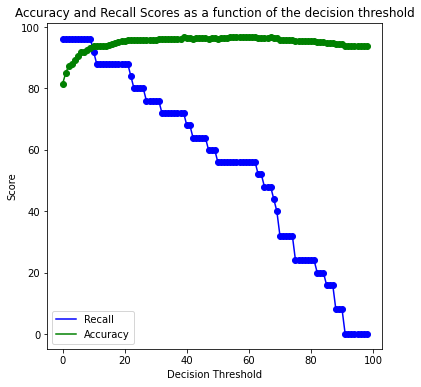

In [25]:
cross_val_ypred = cross_val_predict(RandomForestClassifier(random_state = 1, oob_score = True, verbose = False, n_jobs=-1, max_depth = 3, n_estimators = 250), X_train, y_train, cv = 5, method = 'predict_proba')

def plot_accuracy_recall_vs_threshold(y_proba, y_true):
    recall_iter = []
    accuracy_iter = []
    threshold_val = 100
    threshold_hyperparam_vals = np.arange(0.01, 1, 0.01)
    for threshold_prob in threshold_hyperparam_vals:
        predicted_class = y_proba[:,1] > threshold_prob
        predicted_class = predicted_class.astype(int)
        accuracy = accuracy_score(y_true, predicted_class)*100
        recall = recall_score(y_true, predicted_class)*100
        accuracy_iter.append(accuracy)
        recall_iter.append(recall)
        if (accuracy > recall) & (threshold_prob < threshold_val):
            threshold_val = threshold_prob
            print(threshold_val)
    
    plt.figure(figsize=(6, 6))
    plt.title("Accuracy and Recall Scores as a function of the decision threshold")
    plt.plot(recall_iter, "b-", label="Recall")
    plt.plot(accuracy_iter, "g-", label="Accuracy")
    plt.plot(recall_iter, "o", color = 'blue')
    plt.plot(accuracy_iter, "o", color = 'green')
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()

plot_accuracy_recall_vs_threshold(cross_val_ypred, y_train)

Decision threshold = .11

In [29]:
y_pred = (result.predict_proba(X_test)[:,1] > .11).astype(int)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.8959810874704491
Recall: 0.72
Precision: 0.32727272727272727
Confusion Matrix:
[[361  37]
 [  7  18]]


In [30]:
misclassified_players = [nba_2018_2019.loc[i, 'Player'] for i in range(len(y_pred)) if y_pred[i] == 0 and y_test.iloc[i] == 1]

print("Players predicted as 0 but actually belong to class 1:")
for player in misclassified_players:
    print(player)

Players predicted as 0 but actually belong to class 1:
Bam Adebayo
Rudy Gobert
Khris Middleton
Chris Paul
Domantas Sabonis
Pascal Siakam
Jayson Tatum


In [31]:
misclassified_players = [nba_2018_2019.loc[i, 'Player'] for i in range(len(y_pred)) if y_pred[i] == 1 and y_test.iloc[i] == 0]

print("Players predicted as 1 but actually belong to class 0:")
for player in misclassified_players:
    print(player)

Players predicted as 1 but actually belong to class 0:
Tobias Harris
LaMarcus Aldridge
Deandre Ayton
Bradley Beal
Clint Capela
John Collins
Mike Conley
DeMarcus Cousins
Stephen Curry
DeMar DeRozan
Andre Drummond
Kevin Durant
De'Aaron Fox
Danilo Gallinari
Paul George
Eric Gordon
Blake Griffin
Montrezl Harrell
Buddy Hield
Jrue Holiday
Kyrie Irving
Kyle Kuzma
Zach LaVine
Kevin Love
Lauri Markkanen
CJ McCollum
Jusuf Nurkić
Victor Oladipo
Julius Randle
J.J. Redick
Derrick Rose
D'Angelo Russell
Klay Thompson
Karl-Anthony Towns
Nikola Vučević
John Wall
Lou Williams


In [32]:
model = RandomForestClassifier(random_state=45, n_jobs = -1, bootstrap = False, max_features = 3, n_estimators = 250).fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.9314420803782506
Recall: 0.52
Precision: 0.43333333333333335
Confusion Matrix:
[[381  17]
 [ 12  13]]


In [33]:
misclassified_players = [nba_2018_2019.loc[i, 'Player'] for i in range(len(y_pred)) if y_pred[i] == 0 and y_test.iloc[i] == 1]

print("Players predicted as 0 but actually belong to class 1:")
for player in misclassified_players:
    print(player)

Players predicted as 0 but actually belong to class 1:
Jimmy Butler
Bam Adebayo
Rudy Gobert
Brandon Ingram
Kyle Lowry
Khris Middleton
Donovan Mitchell
Chris Paul
Domantas Sabonis
Pascal Siakam
Jayson Tatum
Trae Young


In [34]:
misclassified_players = [nba_2018_2019.loc[i, 'Player'] for i in range(len(y_pred)) if y_pred[i] == 1 and y_test.iloc[i] == 0]

print("Players predicted as 1 but actually belong to class 0:")
for player in misclassified_players:
    print(player)

Players predicted as 1 but actually belong to class 0:
Tobias Harris
LaMarcus Aldridge
Bradley Beal
John Collins
Stephen Curry
Andre Drummond
Kevin Durant
Paul George
Blake Griffin
Buddy Hield
Jrue Holiday
Kyrie Irving
Zach LaVine
Julius Randle
Klay Thompson
Karl-Anthony Towns
Nikola Vučević
